In [127]:
# Importing the Dependencies
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score 
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score

In [3]:
# Loading the dataset to a Pandas DataFrame
credit_card_data = pd.read_csv(r"E:\New\Project\New folder\creditcard.csv")

In [5]:
credit_card_data

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
284802,172786.0,-11.881118,10.071785,-9.834783,-2.066656,-5.364473,-2.606837,-4.918215,7.305334,1.914428,...,0.213454,0.111864,1.014480,-0.509348,1.436807,0.250034,0.943651,0.823731,0.77,0
284803,172787.0,-0.732789,-0.055080,2.035030,-0.738589,0.868229,1.058415,0.024330,0.294869,0.584800,...,0.214205,0.924384,0.012463,-1.016226,-0.606624,-0.395255,0.068472,-0.053527,24.79,0
284804,172788.0,1.919565,-0.301254,-3.249640,-0.557828,2.630515,3.031260,-0.296827,0.708417,0.432454,...,0.232045,0.578229,-0.037501,0.640134,0.265745,-0.087371,0.004455,-0.026561,67.88,0
284805,172788.0,-0.240440,0.530483,0.702510,0.689799,-0.377961,0.623708,-0.686180,0.679145,0.392087,...,0.265245,0.800049,-0.163298,0.123205,-0.569159,0.546668,0.108821,0.104533,10.00,0


In [7]:
# First 5 rows of the dataset
credit_card_data.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


In [9]:
# Last 5 rows of the dataset
credit_card_data.tail()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
284802,172786.0,-11.881118,10.071785,-9.834783,-2.066656,-5.364473,-2.606837,-4.918215,7.305334,1.914428,...,0.213454,0.111864,1.014480,-0.509348,1.436807,0.250034,0.943651,0.823731,0.77,0
284803,172787.0,-0.732789,-0.055080,2.035030,-0.738589,0.868229,1.058415,0.024330,0.294869,0.584800,...,0.214205,0.924384,0.012463,-1.016226,-0.606624,-0.395255,0.068472,-0.053527,24.79,0
284804,172788.0,1.919565,-0.301254,-3.249640,-0.557828,2.630515,3.031260,-0.296827,0.708417,0.432454,...,0.232045,0.578229,-0.037501,0.640134,0.265745,-0.087371,0.004455,-0.026561,67.88,0
284805,172788.0,-0.240440,0.530483,0.702510,0.689799,-0.377961,0.623708,-0.686180,0.679145,0.392087,...,0.265245,0.800049,-0.163298,0.123205,-0.569159,0.546668,0.108821,0.104533,10.00,0
284806,172792.0,-0.533413,-0.189733,0.703337,-0.506271,-0.012546,-0.649617,1.577006,-0.414650,0.486180,...,0.261057,0.643078,0.376777,0.008797,-0.473649,-0.818267,-0.002415,0.013649,217.00,0


In [11]:
# dataset informations
credit_card_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 284807 entries, 0 to 284806
Data columns (total 31 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   Time    284807 non-null  float64
 1   V1      284807 non-null  float64
 2   V2      284807 non-null  float64
 3   V3      284807 non-null  float64
 4   V4      284807 non-null  float64
 5   V5      284807 non-null  float64
 6   V6      284807 non-null  float64
 7   V7      284807 non-null  float64
 8   V8      284807 non-null  float64
 9   V9      284807 non-null  float64
 10  V10     284807 non-null  float64
 11  V11     284807 non-null  float64
 12  V12     284807 non-null  float64
 13  V13     284807 non-null  float64
 14  V14     284807 non-null  float64
 15  V15     284807 non-null  float64
 16  V16     284807 non-null  float64
 17  V17     284807 non-null  float64
 18  V18     284807 non-null  float64
 19  V19     284807 non-null  float64
 20  V20     284807 non-null  float64
 21  V21     28

In [13]:
# Checking the number of missing values in each column
credit_card_data.isnull().sum()

Time      0
V1        0
V2        0
V3        0
V4        0
V5        0
V6        0
V7        0
V8        0
V9        0
V10       0
V11       0
V12       0
V13       0
V14       0
V15       0
V16       0
V17       0
V18       0
V19       0
V20       0
V21       0
V22       0
V23       0
V24       0
V25       0
V26       0
V27       0
V28       0
Amount    0
Class     0
dtype: int64

In [15]:
# Distribution of legit transactions & fraudulent transactions
credit_card_data['Class'].value_counts()

Class
0    284315
1       492
Name: count, dtype: int64

This Dataset is highly unbalanced


0 --> Normal Transaction

1 --> Fraudulent Transaction

In [20]:
# Separating the data for analysis
legit = credit_card_data[credit_card_data.Class == 0]
fraud = credit_card_data[credit_card_data.Class == 1]

In [22]:
print(legit.shape)
print(fraud.shape)

(284315, 31)
(492, 31)


In [24]:
# statistical measures of the data
legit.Amount.describe()

count    284315.000000
mean         88.291022
std         250.105092
min           0.000000
25%           5.650000
50%          22.000000
75%          77.050000
max       25691.160000
Name: Amount, dtype: float64

In [26]:
fraud.Amount.describe()

count     492.000000
mean      122.211321
std       256.683288
min         0.000000
25%         1.000000
50%         9.250000
75%       105.890000
max      2125.870000
Name: Amount, dtype: float64

Here mean value is bigger as compared to legit

In [29]:
# Compare the values for both transactions
credit_card_data.groupby('Class').mean()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount
Class,,,,,,,,,,,,,,,,,,,,,
0,94838.202258,0.008258,-0.006271,0.012171,-0.007860,0.005453,0.002419,0.009637,-0.000987,0.004467,...,-0.000644,-0.001235,-0.000024,0.000070,0.000182,-0.000072,-0.000089,-0.000295,-0.000131,88.291022
1,80746.806911,-4.771948,3.623778,-7.033281,4.542029,-3.151225,-1.397737,-5.568731,0.570636,-2.581123,...,0.372319,0.713588,0.014049,-0.040308,-0.105130,0.041449,0.051648,0.170575,0.075667,122.211321


Under-Sampling

Build a sample dataset containing similar distribution of normal transactions(legit) and Fraudulent transactions

Number of Fraudulent Transactions --> 492

In [34]:
legit_sample = legit.sample(n=495)

In [36]:
# Concatenating two DataFrames
new_dataset = pd.concat([legit_sample, fraud], axis=0)

In [38]:
new_dataset.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
268071,163043.0,1.994048,-0.321409,-0.332963,0.327068,-0.725164,-0.739956,-0.517185,-0.025800,1.460065,...,-0.127407,-0.260927,0.362239,-0.166904,-0.402239,-0.913702,0.056830,-0.030058,1.00,0
217575,140945.0,-0.395981,0.869792,1.064767,-0.192640,-0.424603,-0.489423,-0.028154,0.352091,0.117280,...,0.385251,1.223971,-0.263518,0.122260,0.104077,-0.072019,-0.025640,-0.026540,5.00,0
246037,153011.0,-0.357641,0.378350,1.494325,-0.285018,-0.090485,0.234647,0.239244,0.192475,0.024709,...,0.363715,1.127580,-0.223809,-0.274175,-0.338526,0.487213,0.138644,0.154533,42.00,0
77204,56943.0,1.464638,-0.869709,0.018233,-1.320809,-1.213995,-1.266154,-0.419895,-0.404992,-2.237962,...,-0.498557,-1.171517,0.133598,0.346358,0.301198,-0.485875,0.000812,0.025174,54.95,0
149753,91856.0,2.101512,-0.674372,-0.399302,-0.368686,-1.174745,-1.511837,-0.605124,-0.443827,0.959534,...,0.119088,0.658196,0.259994,0.852141,-0.199862,-0.255649,-0.037968,-0.051172,25.00,0


Random dataset is picked.

In [41]:
new_dataset.tail()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
279863,169142.0,-1.927883,1.125653,-4.518331,1.749293,-1.566487,-2.010494,-0.882850,0.697211,-2.064945,...,0.778584,-0.319189,0.639419,-0.294885,0.537503,0.788395,0.292680,0.147968,390.00,1
280143,169347.0,1.378559,1.289381,-5.004247,1.411850,0.442581,-1.326536,-1.413170,0.248525,-1.127396,...,0.370612,0.028234,-0.145640,-0.081049,0.521875,0.739467,0.389152,0.186637,0.76,1
280149,169351.0,-0.676143,1.126366,-2.213700,0.468308,-1.120541,-0.003346,-2.234739,1.210158,-0.652250,...,0.751826,0.834108,0.190944,0.032070,-0.739695,0.471111,0.385107,0.194361,77.89,1
281144,169966.0,-3.113832,0.585864,-5.399730,1.817092,-0.840618,-2.943548,-2.208002,1.058733,-1.632333,...,0.583276,-0.269209,-0.456108,-0.183659,-0.328168,0.606116,0.884876,-0.253700,245.00,1
281674,170348.0,1.991976,0.158476,-2.583441,0.408670,1.151147,-0.096695,0.223050,-0.068384,0.577829,...,-0.164350,-0.295135,-0.072173,-0.450261,0.313267,-0.289617,0.002988,-0.015309,42.53,1


In [43]:
new_dataset['Class'].value_counts()

Class
0    495
1    492
Name: count, dtype: int64

In [45]:
#
new_dataset.groupby('Class').mean()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount
Class,,,,,,,,,,,,,,,,,,,,,
0,98023.357576,0.071781,-0.021344,-0.040483,-0.082473,-0.013451,0.042665,0.030950,-0.024853,-0.025332,...,0.011267,0.055386,0.046713,0.023923,0.020192,0.010483,-0.009964,-0.001428,-0.012793,89.412808
1,80746.806911,-4.771948,3.623778,-7.033281,4.542029,-3.151225,-1.397737,-5.568731,0.570636,-2.581123,...,0.372319,0.713588,0.014049,-0.040308,-0.105130,0.041449,0.051648,0.170575,0.075667,122.211321


Here we conclude that the nature of data set is not change.

In [48]:
# Splitting the data into Features & Targets
X = new_dataset.drop(columns='Class', axis=1)
Y = new_dataset['Class']

In [50]:
print(X)

            Time        V1        V2        V3        V4        V5        V6  \
268071  163043.0  1.994048 -0.321409 -0.332963  0.327068 -0.725164 -0.739956   
217575  140945.0 -0.395981  0.869792  1.064767 -0.192640 -0.424603 -0.489423   
246037  153011.0 -0.357641  0.378350  1.494325 -0.285018 -0.090485  0.234647   
77204    56943.0  1.464638 -0.869709  0.018233 -1.320809 -1.213995 -1.266154   
149753   91856.0  2.101512 -0.674372 -0.399302 -0.368686 -1.174745 -1.511837   
...          ...       ...       ...       ...       ...       ...       ...   
279863  169142.0 -1.927883  1.125653 -4.518331  1.749293 -1.566487 -2.010494   
280143  169347.0  1.378559  1.289381 -5.004247  1.411850  0.442581 -1.326536   
280149  169351.0 -0.676143  1.126366 -2.213700  0.468308 -1.120541 -0.003346   
281144  169966.0 -3.113832  0.585864 -5.399730  1.817092 -0.840618 -2.943548   
281674  170348.0  1.991976  0.158476 -2.583441  0.408670  1.151147 -0.096695   

              V7        V8        V9  .

In [52]:
print(Y)

268071    0
217575    0
246037    0
77204     0
149753    0
         ..
279863    1
280143    1
280149    1
281144    1
281674    1
Name: Class, Length: 987, dtype: int64


In [54]:
# Split the data into Training data & Testing Data
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, stratify=Y, random_state=2)

In [56]:
print(X.shape, X_train.shape, X_test.shape)

(987, 30) (789, 30) (198, 30)


<h2>Model Training</h2>

<h3 style="color:purple"> Logistic Regression</h3>

In [60]:
model = LogisticRegression()

In [62]:
# training the Logistic Regression Model with Training Data
model.fit(X_train, Y_train)

LogisticRegression()

In [64]:
# Accuracy on training data
X_train_prediction = model.predict(X_train)
training_data_accuracy = accuracy_score(X_train_prediction, Y_train)

In [66]:
print('Accuracy on Training data:', training_data_accuracy)

Accuracy on Training data: 0.9163498098859315


In [68]:
# Accuracy on test data
X_test_prediction = model.predict(X_test)
test_data_accuracy = accuracy_score(X_test_prediction, Y_test)

In [70]:
print('Accuracy score on Test Data:', test_data_accuracy)

Accuracy score on Test Data: 0.9040404040404041


<h3 style="color:purple">Decision Tree</h3>

In [97]:
# Initialize the Decision Tree Classifier
dt_classifier = DecisionTreeClassifier(random_state=42)

In [99]:
# Train the model
dt_classifier.fit(X_train, Y_train)

DecisionTreeClassifier(random_state=42)

In [107]:
# Make Prediction
Y_pred=dt_classifier.predict(X_test)

In [109]:
# Evaluate the model
print("Confusion Matrix:\n", confusion_matrix(Y_test, Y_pred))
print("\nClassification Report:\n", classification_report(Y_test, Y_pred))
print("\n Accuracy Score:", accuracy_score(Y_test, Y_pred))

Confusion Matrix:
 [[90  9]
 [12 87]]

Classification Report:
               precision    recall  f1-score   support

           0       0.88      0.91      0.90        99
           1       0.91      0.88      0.89        99

    accuracy                           0.89       198
   macro avg       0.89      0.89      0.89       198
weighted avg       0.89      0.89      0.89       198


 Accuracy Score: 0.8939393939393939


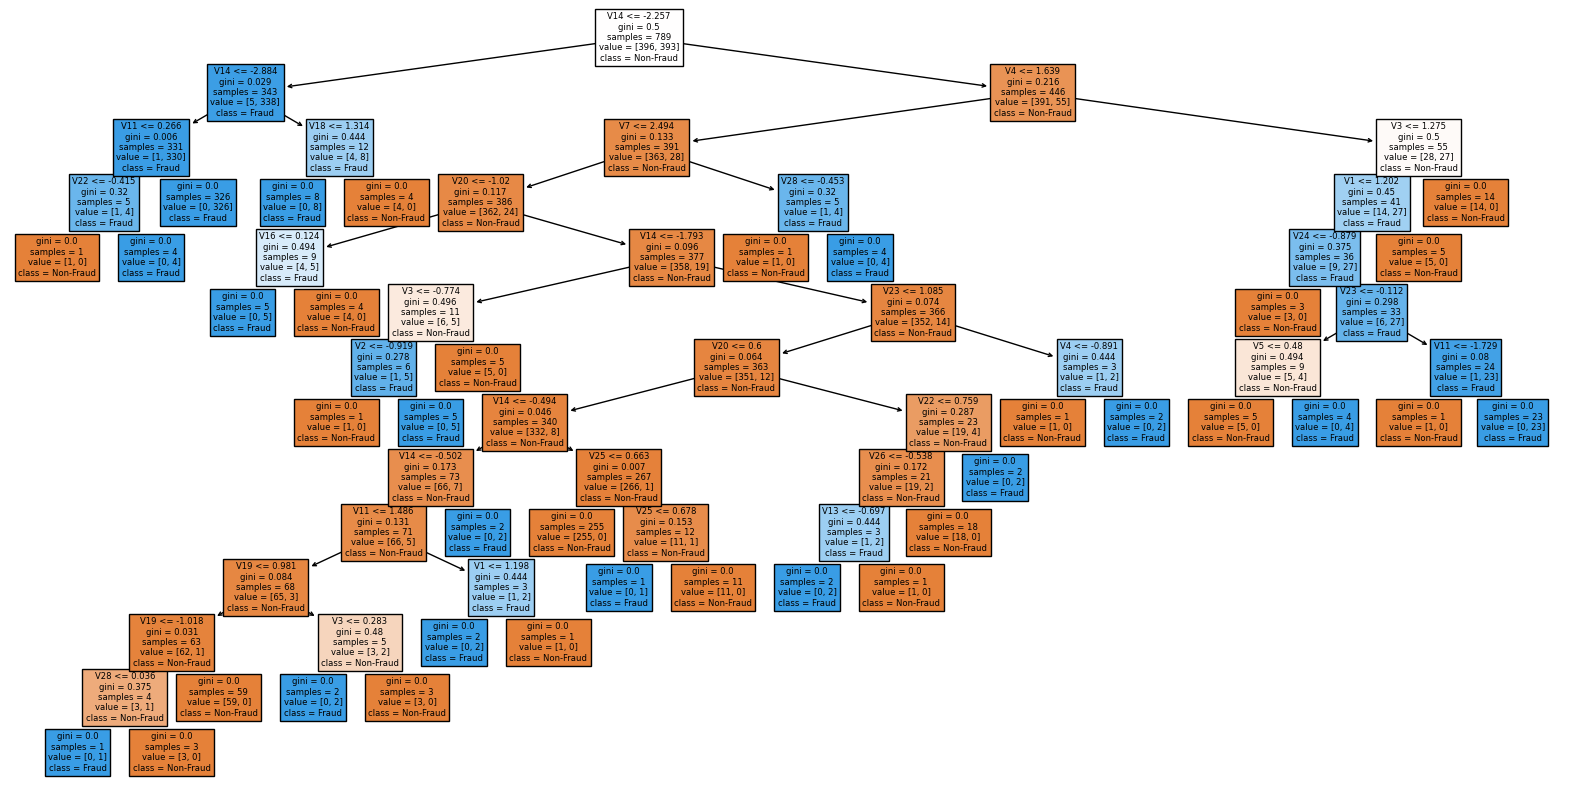

In [111]:
#Visualize the tree
from sklearn.tree import plot_tree
import matplotlib.pyplot as plt
plt.figure(figsize=(20,10))
plot_tree(dt_classifier, feature_names=X.columns, class_names=["Non-Fraud","Fraud"], filled=True)
plt.show()

<h2 style="color:purple">Support Machine Vector</h2>

In [119]:
#Initialize the Support Vector Classifier
svm_classifier = SVC(kernel='rbf', C=1, gamma='scale', random_state=42)

In [121]:
# Train the model
svm_classifier.fit(X_train, Y_train)

SVC(C=1, random_state=42)

In [123]:
# Make Prediction
Y_pred=svm_classifier.predict(X_test)

In [146]:
# Evaluate the model
print("Confusion Matrix:\n", confusion_matrix(Y_test, Y_pred))
print("\nClassification Report:\n", classification_report(Y_test, Y_pred))
print("Accuracy Score:", accuracy_score(Y_test, Y_pred))

Confusion Matrix:
 [[63 36]
 [33 66]]

Classification Report:
               precision    recall  f1-score   support

           0       0.66      0.64      0.65        99
           1       0.65      0.67      0.66        99

    accuracy                           0.65       198
   macro avg       0.65      0.65      0.65       198
weighted avg       0.65      0.65      0.65       198

Accuracy Score: 0.6515151515151515


<h3 style="color:purple">K Nearest Neighbors</h3>

In [140]:
# Initialize the k-NN Classifier 
knn_classifier = KNeighborsClassifier(n_neighbors=5, weights='uniform', metric='minkowski',p=2)

In [142]:
# Train the model
knn_classifier.fit(X_train, Y_train)

KNeighborsClassifier()

In [144]:
# Make Prediction
Y_pred = knn_classifier.predict(X_test)

In [148]:
# Evaluate the model
print("Confusion Matrix:\n", confusion_matrix(Y_test, Y_pred))
print("\nClassification Report:\n", classification_report(Y_test, Y_pred))
print("Accuracy Score:", accuracy_score(Y_test, Y_pred))

Confusion Matrix:
 [[63 36]
 [33 66]]

Classification Report:
               precision    recall  f1-score   support

           0       0.66      0.64      0.65        99
           1       0.65      0.67      0.66        99

    accuracy                           0.65       198
   macro avg       0.65      0.65      0.65       198
weighted avg       0.65      0.65      0.65       198

Accuracy Score: 0.6515151515151515


<h4 style="color:green"> Accuracy Score is higher in Logistic Regression</h3> 